Mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import re
import nltk
import spacy
import string
#import textract
import pandas as pd
import seaborn as sns
from matplotlib import pylab
from matplotlib import pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install textract

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 69.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.5/128.5 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [ ]:
os.listdir('/content/drive/MyDrive/Resumes')

['Peoplesoft resumes',
 'React JS Developer',
 'workday resumes',
 'SQL Developer Lightning insight']

Extracting the text from the dataset

In [ ]:
import textract

In [ ]:
file_path1 = []
category1  = []
directory1 = '/content/drive/MyDrive/Resumes/Peoplesoft resumes/'
for i in os.listdir(directory1):
    if i.endswith('.docx'):
        os.path.join(directory1, i)
        file_path1.append((textract.process(os.path.join(directory1, i))).decode('utf-8'))
        category1.append('PeopleSoft')

In [ ]:
data1 = pd.DataFrame(data = file_path1 , columns = ['Raw_Details'])
data1['Category1'] = category1
data1

,Raw_Details,Category1
0,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft
1,Classification: Internal\n\nClassification: In...,PeopleSoft
2,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft
3,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft
4,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft
5,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft
6,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft
7,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft
8,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft
9,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft


In [ ]:
file_path2 = []
category2  = []
directory2 = '/content/drive/MyDrive/Resumes/React JS Developer/'
for i in os.listdir(directory2):
    if i.endswith('.docx'):
        os.path.join(directory2, i)
        file_path2.append((textract.process(os.path.join(directory2, i))).decode('utf-8'))
        category2.append('React JS Developer')

In [ ]:
data2 = pd.DataFrame(data = file_path2 , columns = ['Raw_Details'])
data2['Category2'] = category2
data2

,Raw_Details,Category2
0,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer
1,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer
2,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS Developer
3,Name: Ravali P \n\n\n\n ...,React JS Developer
4,KAMBALA SAI SURENDRA \n\n \n\n \n\n \n\n\n\n...,React JS Developer
5,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer
6,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer
7,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,React JS Developer
8,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer
9,Venkatalakshmi Pedireddy\n\nSoftware Developer...,React JS Developer


In [ ]:
file_path3 = []
category3  = []
directory3 = '/content/drive/MyDrive/Resumes/SQL Developer Lightning insight/'
for i in os.listdir(directory3):
    if i.endswith('.docx'):
        os.path.join(directory3, i)
        file_path3.append((textract.process(os.path.join(directory3, i))).decode('utf-8'))
        category3.append('SQL Developer')

In [ ]:
data3 = pd.DataFrame(data = file_path3 , columns = ['Raw_Details'])
data3['Category3'] = category3
data3

,Raw_Details,Category3
0,resume\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\tRama...,SQL Developer
1,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL Developer
2,Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...,SQL Developer
3,SQL AND MSBI DEVELOPER\n\nSQL AND MSBI DEVELOP...,SQL Developer
4,BUDDHA VAMSI ...,SQL Developer
5,SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...,SQL Developer
6,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer
7,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,SQL Developer
8,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,SQL Developer
9,KAMBALLA PRADEEP ...,SQL Developer


In [ ]:

file_path4 = []
category4  = []
directory4 = '/content/drive/MyDrive/Resumes/workday resumes/'
for i in os.listdir(directory4):
    if i.endswith('.docx'):
        os.path.join(directory4, i)
        file_path4.append((textract.process(os.path.join(directory4, i))).decode('utf-8'))
        category4.append('Workday')

In [ ]:
data4 = pd.DataFrame(data = file_path4 , columns = ['Raw_Details'])
data4['Category4'] = category4
data4

,Raw_Details,Category4
0,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,Workday
1,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,Workday
2,Workday HCM Techno functional Consultant ...,Workday
3,G Himaja\n\n ...,Workday
4,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,Workday
5,Srikanth (WORKDAY hCM Consultant)\t ...,Workday
6,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,Workday
7,Vinay kumar .v\nWorkday Functional Consultant\...,Workday
8,Mooraboyina Guravaiah\n\nWorkday Integration S...,Workday
9,VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...,Workday


Creating a DataFrame

In [ ]:
Resume_data = data1.append([data2, data3, data4], ignore_index = True)
Resume_data

,Raw_Details,Category1,Category2,Category3,Category4
0,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft,NaN,NaN,NaN
1,Classification: Internal\n\nClassification: In...,PeopleSoft,NaN,NaN,NaN
2,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft,NaN,NaN,NaN
3,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft,NaN,NaN,NaN
4,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft,NaN,NaN,NaN
5,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft,NaN,NaN,NaN
6,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft,NaN,NaN,NaN
7,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft,NaN,NaN,NaN
8,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft,NaN,NaN,NaN
9,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft,NaN,NaN,NaN


In [ ]:
Resume_data.shape

(52, 5)

In [ ]:
Resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Raw_Details  52 non-null     object
 1   Category1    10 non-null     object
 2   Category2    20 non-null     object
 3   Category3    11 non-null     object
 4   Category4    11 non-null     object
dtypes: object(5)
memory usage: 2.2+ KB


Merging all the columns into one

In [ ]:
Resume_data['Category'] = category1 + category2 + category3 + category4
Resume_data

,Raw_Details,Category1,Category2,Category3,Category4,Category
0,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
1,Classification: Internal\n\nClassification: In...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
2,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
3,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
4,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
5,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
6,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft,NaN,NaN,NaN,PeopleSoft
7,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
8,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
9,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft,NaN,NaN,NaN,PeopleSoft


Dropping other 4 columns

In [ ]:
Resume_data.drop(['Category1', 'Category2', 'Category3', 'Category4'], axis = 1, inplace = True)
resume_data = Resume_data[["Category", "Raw_Details"]]

Our final data

In [ ]:
resume_data

,Category,Raw_Details
0,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...
1,PeopleSoft,Classification: Internal\n\nClassification: In...
2,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...
3,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...
4,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...
5,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
6,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n..."
7,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...
8,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...
9,PeopleSoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...


In [ ]:
resume_data.shape

(52, 2)

In [ ]:
resume_data["Raw_Details"][3]

'Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSeeking a challenging role in the area of IT to work in an organization where I can utilize my functional knowledge to provide the best solutions to the business.\n\n\n\nPROFESSIONAL SUMMARY:\n\n\n\n\t\tFunctional Expertise in the below PeopleSoft Finance modules\n\n\tPurchase\n\n\tAccount Payables\n\n\t\tExperienced in working with Reporting tools like PS-query.\n\n\t\tEnd-End functional knowledge of AP & PO modules and handled various change requests from the user.\n\n\n\nSYNOPSIS\n\n\t\tEnergetic and result oriented professional with 3.6 years of experience in IT. Extended expertise in PeopleSoft Financials 9.2 in the area of design, maintenance and production support. Deep understanding of technology with focus on delivering business solutions. Presently working as Sr. System Engineer\n\n\t\tExcellent decision-making skills with a positive approach.\n\n\t\tDedicated and highly ambitious to achieve personal goals as well as the organizatio

Saving the file as csv

In [ ]:
resume_data.to_csv("raw_resume.csv")

In [ ]:
resume_data

,Category,Raw_Details
0,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...
1,PeopleSoft,Classification: Internal\n\nClassification: In...
2,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...
3,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...
4,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...
5,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
6,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n..."
7,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...
8,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...
9,PeopleSoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...


In [ ]:
resume_data=pd.read_csv("raw_resume.csv")
resume_data

,Unnamed: 0,Category,Raw_Details
0,0,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...
1,1,PeopleSoft,Classification: Internal\n\nClassification: In...
2,2,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...
3,3,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...
4,4,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...
5,5,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
6,6,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n..."
7,7,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...
8,8,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...
9,9,PeopleSoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...


In [ ]:
resume_data[resume_data.Category == 'Workday']

,Unnamed: 0,Category,Raw_Details
41,41,Workday,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...
42,42,Workday,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...
43,43,Workday,Workday HCM Techno functional Consultant ...
44,44,Workday,G Himaja\n\n ...
45,45,Workday,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...
46,46,Workday,Srikanth (WORKDAY hCM Consultant)\t ...
47,47,Workday,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...
48,48,Workday,Vinay kumar .v\nWorkday Functional Consultant\...
49,49,Workday,Mooraboyina Guravaiah\n\nWorkday Integration S...
50,50,Workday,VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...


In [ ]:
resume_data.isnull().sum()

Unnamed: 0     0
Category       0
Raw_Details    0
dtype: int64

Word Count

In [ ]:
resume_data['Word_Count'] = resume_data['Raw_Details'].apply(lambda x: len(str(x).split(" ")))
resume_data[['Raw_Details','Word_Count']].head()

,Raw_Details,Word_Count
0,PeopleSoft Administration\n\n \n\nVivekanand S...,2585
1,Classification: Internal\n\nClassification: In...,558
2,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,918
3,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,363
4,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,356


Characters count

In [ ]:
resume_data['Char_Count'] = resume_data['Raw_Details'].str.len()  #including spaces
resume_data[['Raw_Details','Char_Count']].head()

,Raw_Details,Char_Count
0,PeopleSoft Administration\n\n \n\nVivekanand S...,16112
1,Classification: Internal\n\nClassification: In...,4917
2,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,7943
3,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,2852
4,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,2150


Number of stopwords

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
resume_data['Stopwords'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x in stop]))
resume_data[['Raw_Details','Stopwords']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Raw_Details,Stopwords
0,PeopleSoft Administration\n\n \n\nVivekanand S...,520
1,Classification: Internal\n\nClassification: In...,114
2,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,225
3,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,98
4,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,42


Numbers count

In [ ]:
resume_data['Numerics'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
resume_data[['Raw_Details','Numerics']].head()

,Raw_Details,Numerics
0,PeopleSoft Administration\n\n \n\nVivekanand S...,17
1,Classification: Internal\n\nClassification: In...,7
2,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,4
3,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,4
4,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,8


In [ ]:
resume_data

,Unnamed: 0,Category,Raw_Details,Word_Count,Char_Count,Stopwords,Numerics
0,0,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...,2585,16112,520,17
1,1,PeopleSoft,Classification: Internal\n\nClassification: In...,558,4917,114,7
2,2,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,918,7943,225,4
3,3,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,363,2852,98,4
4,4,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,356,2150,42,8
5,5,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1023,8010,190,4
6,6,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",455,3800,86,15
7,7,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,433,3669,84,13
8,8,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...,448,3714,88,13
9,9,PeopleSoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,540,3577,136,3


Text Preprocessing

In [ ]:

def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]

    return " ".join(filtered_words)

In [ ]:
resume_data = pd.read_csv('raw_resume.csv',index_col=0)
resume_data['Resume_Details'] = resume_data.Raw_Details.apply(lambda x: preprocess(x))


In [ ]:
resume_data

,Category,Raw_Details,Resume_Details
0,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...,peoplesoft administration vivekanand sayana ca...
1,PeopleSoft,Classification: Internal\n\nClassification: In...,classification internal classification interna...
2,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,peoplesoft admin varkala vikas career objectiv...
3,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,tanna sujatha objective seeking challenging ro...
4,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,address manyata tech park nagavara bangalore l...
5,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,anubhav kumar singh core competencies scriptin...
6,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",sirazuddin bangalore india sirazuddin bangalor...
7,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,murali professional summary years experience p...
8,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...,hari narayana professional summary years exper...
9,PeopleSoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,priyabrata hota career objective pursuing peop...


In [ ]:
resume_data.drop(['Raw_Details'], axis = 1, inplace = True)
resume_data

,Category,Resume_Details
0,PeopleSoft,peoplesoft administration vivekanand sayana ca...
1,PeopleSoft,classification internal classification interna...
2,PeopleSoft,peoplesoft admin varkala vikas career objectiv...
3,PeopleSoft,tanna sujatha objective seeking challenging ro...
4,PeopleSoft,address manyata tech park nagavara bangalore l...
5,PeopleSoft,anubhav kumar singh core competencies scriptin...
6,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...
7,PeopleSoft,murali professional summary years experience p...
8,PeopleSoft,hari narayana professional summary years exper...
9,PeopleSoft,priyabrata hota career objective pursuing peop...


Cleaned Resume

In [ ]:
resume_data.to_csv('Cleaned_Resumes.csv', index = False)

In [ ]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Category,Resume_Details
0,PeopleSoft,peoplesoft administration vivekanand sayana ca...
1,PeopleSoft,classification internal classification interna...
2,PeopleSoft,peoplesoft admin varkala vikas career objectiv...
3,PeopleSoft,tanna sujatha objective seeking challenging ro...
4,PeopleSoft,address manyata tech park nagavara bangalore l...
5,PeopleSoft,anubhav kumar singh core competencies scriptin...
6,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...
7,PeopleSoft,murali professional summary years experience p...
8,PeopleSoft,hari narayana professional summary years exper...
9,PeopleSoft,priyabrata hota career objective pursuing peop...


In [ ]:
resume_data.Resume_Details[4]

'address manyata tech park nagavara bangalore linin subha santosh peoplesoft finance fscm ariba java full stack development sql power learning new technologies planting hybrid species cooking travelling singing time management responsible deliverables leadership qualities japanese french started learning sri subha santosh kumar josyula years experience assistance development projects like ariba peoplesoft finance successfully completed tools patch tools upgrade project refuse validations main point contact non regression testing user acceptance testing responsible find solutions makes customer satisfaction associate consultant capgemini axa june till date working modules like accounts payable accounts receivable general ledger expenses user profile self service uss security along application designer sql server organised customer information account data business planning customer service purposes received positive customer survey results worked people code packaging activities success

Tokenization

In [ ]:
import nltk
nltk.download('punkt')
resume_data['Tokenized_Resumes'] = resume_data['Resume_Details'].apply(lambda x: nltk.word_tokenize(x))
resume_data.head(10)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Category,Resume_Details,Tokenized_Resumes
0,PeopleSoft,peoplesoft administration vivekanand sayana ca...,"[peoplesoft, administration, vivekanand, sayan..."
1,PeopleSoft,classification internal classification interna...,"[classification, internal, classification, int..."
2,PeopleSoft,peoplesoft admin varkala vikas career objectiv...,"[peoplesoft, admin, varkala, vikas, career, ob..."
3,PeopleSoft,tanna sujatha objective seeking challenging ro...,"[tanna, sujatha, objective, seeking, challengi..."
4,PeopleSoft,address manyata tech park nagavara bangalore l...,"[address, manyata, tech, park, nagavara, banga..."
5,PeopleSoft,anubhav kumar singh core competencies scriptin...,"[anubhav, kumar, singh, core, competencies, sc..."
6,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...,"[sirazuddin, bangalore, india, sirazuddin, ban..."
7,PeopleSoft,murali professional summary years experience p...,"[murali, professional, summary, years, experie..."
8,PeopleSoft,hari narayana professional summary years exper...,"[hari, narayana, professional, summary, years,..."
9,PeopleSoft,priyabrata hota career objective pursuing peop...,"[priyabrata, hota, career, objective, pursuing..."


In [ ]:
resume_data.drop(['Tokenized_Resumes'],axis=1,inplace=True)

Stopwords removal

In [ ]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

cleaned_resumes = []

for index, row in resume_data.iterrows():

    words_without_stopwords = [word for word in row.Resume_Details.split()]

    cleaned_resumes.append(' '.join(words_without_stopwords))

resume_data['Final_Clean_Resumes'] = cleaned_resumes
resume_data.head(10)

,Category,Resume_Details,Final_Clean_Resumes
0,PeopleSoft,peoplesoft administration vivekanand sayana ca...,peoplesoft administration vivekanand sayana ca...
1,PeopleSoft,classification internal classification interna...,classification internal classification interna...
2,PeopleSoft,peoplesoft admin varkala vikas career objectiv...,peoplesoft admin varkala vikas career objectiv...
3,PeopleSoft,tanna sujatha objective seeking challenging ro...,tanna sujatha objective seeking challenging ro...
4,PeopleSoft,address manyata tech park nagavara bangalore l...,address manyata tech park nagavara bangalore l...
5,PeopleSoft,anubhav kumar singh core competencies scriptin...,anubhav kumar singh core competencies scriptin...
6,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...,sirazuddin bangalore india sirazuddin bangalor...
7,PeopleSoft,murali professional summary years experience p...,murali professional summary years experience p...
8,PeopleSoft,hari narayana professional summary years exper...,hari narayana professional summary years exper...
9,PeopleSoft,priyabrata hota career objective pursuing peop...,priyabrata hota career objective pursuing peop...


In [ ]:
Tokenized_Resume = resume_data['Final_Clean_Resumes'].apply(lambda x: x.split())
Tokenized_Resume.head(10)

0    [peoplesoft, administration, vivekanand, sayan...
1    [classification, internal, classification, int...
2    [peoplesoft, admin, varkala, vikas, career, ob...
3    [tanna, sujatha, objective, seeking, challengi...
4    [address, manyata, tech, park, nagavara, banga...
5    [anubhav, kumar, singh, core, competencies, sc...
6    [sirazuddin, bangalore, india, sirazuddin, ban...
7    [murali, professional, summary, years, experie...
8    [hari, narayana, professional, summary, years,...
9    [priyabrata, hota, career, objective, pursuing...
Name: Final_Clean_Resumes, dtype: object

Lemmatization

In [ ]:
import nltk
nltk.download('wordnet')
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')

Tokenized_Resumes = Tokenized_Resume.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
Tokenized_Resumes.head(10)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


0    [peoplesoft, administration, vivekanand, sayan...
1    [classification, internal, classification, int...
2    [peoplesoft, admin, varkala, vikas, career, ob...
3    [tanna, sujatha, objective, seeking, challengi...
4    [address, manyata, tech, park, nagavara, banga...
5    [anubhav, kumar, singh, core, competency, scri...
6    [sirazuddin, bangalore, india, sirazuddin, ban...
7    [murali, professional, summary, year, experien...
8    [hari, narayana, professional, summary, year, ...
9    [priyabrata, hota, career, objective, pursuing...
Name: Final_Clean_Resumes, dtype: object

In [ ]:
for i, tokens in enumerate(Tokenized_Resume):
    Tokenized_Resume[i] = ' '.join(tokens)

resume_data['Final_Clean_Resumes'] = Tokenized_Resume
resume_data.head(10)

,Category,Resume_Details,Final_Clean_Resumes
0,PeopleSoft,peoplesoft administration vivekanand sayana ca...,peoplesoft administration vivekanand sayana ca...
1,PeopleSoft,classification internal classification interna...,classification internal classification interna...
2,PeopleSoft,peoplesoft admin varkala vikas career objectiv...,peoplesoft admin varkala vikas career objectiv...
3,PeopleSoft,tanna sujatha objective seeking challenging ro...,tanna sujatha objective seeking challenging ro...
4,PeopleSoft,address manyata tech park nagavara bangalore l...,address manyata tech park nagavara bangalore l...
5,PeopleSoft,anubhav kumar singh core competencies scriptin...,anubhav kumar singh core competencies scriptin...
6,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...,sirazuddin bangalore india sirazuddin bangalor...
7,PeopleSoft,murali professional summary years experience p...,murali professional summary years experience p...
8,PeopleSoft,hari narayana professional summary years exper...,hari narayana professional summary years exper...
9,PeopleSoft,priyabrata hota career objective pursuing peop...,priyabrata hota career objective pursuing peop...


NER

In [ ]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resume_data['Final_Clean_Resumes'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = preprocess(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('experience', 330), ('using', 253), ('workday', 232), ('sql', 213), ('application', 208), ('server', 188), ('project', 183), ('data', 180), ('reports', 170), ('peoplesoft', 169), ('business', 165), ('web', 145), ('knowledge', 136), ('react', 132), ('process', 123), ('skills', 118), ('system', 116), ('good', 108), ('client', 105), ('tools', 102), ('working', 101), ('involved', 99), ('database', 99), ('various', 97), ('creating', 97), ('support', 94), ('hcm', 94), ('developer', 94), ('like', 94), ('worked', 93), ('integrations', 92), ('development', 91), ('technical', 89), ('integration', 87), ('servers', 86), ('services', 85), ('report', 83), ('people', 81), ('created', 80), ('html', 80), ('design', 78), ('used', 77), ('team', 74), ('role', 74), ('responsibilities', 72), ('work', 71), ('studio', 71), ('eib', 71), ('testing', 70), ('professional', 69)]


POS Tagging

In [ ]:
nlp = spacy.load('en_core_web_sm')

one_block = cleanedSentences[1300:5200]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style= 'ent', jupyter= True)

Count Vectoriser

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
review_cv=cv.fit_transform(resume_data["Final_Clean_Resumes"])

In [ ]:
print(cv.get_feature_names_out()[100:2000])

['along' 'also' 'alter' ... 'packing' 'packs' 'page']


In [ ]:
print(review_cv.toarray().shape)

(52, 3226)


In [ ]:
resume_data

,Category,Resume_Details,Final_Clean_Resumes
0,PeopleSoft,peoplesoft administration vivekanand sayana ca...,peoplesoft administration vivekanand sayana ca...
1,PeopleSoft,classification internal classification interna...,classification internal classification interna...
2,PeopleSoft,peoplesoft admin varkala vikas career objectiv...,peoplesoft admin varkala vikas career objectiv...
3,PeopleSoft,tanna sujatha objective seeking challenging ro...,tanna sujatha objective seeking challenging ro...
4,PeopleSoft,address manyata tech park nagavara bangalore l...,address manyata tech park nagavara bangalore l...
5,PeopleSoft,anubhav kumar singh core competencies scriptin...,anubhav kumar singh core competencies scriptin...
6,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...,sirazuddin bangalore india sirazuddin bangalor...
7,PeopleSoft,murali professional summary years experience p...,murali professional summary years experience p...
8,PeopleSoft,hari narayana professional summary years exper...,hari narayana professional summary years exper...
9,PeopleSoft,priyabrata hota career objective pursuing peop...,priyabrata hota career objective pursuing peop...


In [ ]:
resume_data.drop(['Resume_Details'],axis=1,inplace=True)

In [ ]:
resume_data

,Category,Final_Clean_Resumes
0,PeopleSoft,peoplesoft administration vivekanand sayana ca...
1,PeopleSoft,classification internal classification interna...
2,PeopleSoft,peoplesoft admin varkala vikas career objectiv...
3,PeopleSoft,tanna sujatha objective seeking challenging ro...
4,PeopleSoft,address manyata tech park nagavara bangalore l...
5,PeopleSoft,anubhav kumar singh core competencies scriptin...
6,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...
7,PeopleSoft,murali professional summary years experience p...
8,PeopleSoft,hari narayana professional summary years exper...
9,PeopleSoft,priyabrata hota career objective pursuing peop...


In [ ]:
resume_data.Category.value_counts()

React JS Developer    20
SQL Developer         11
Workday               11
PeopleSoft            10
Name: Category, dtype: int64

Resume Categories

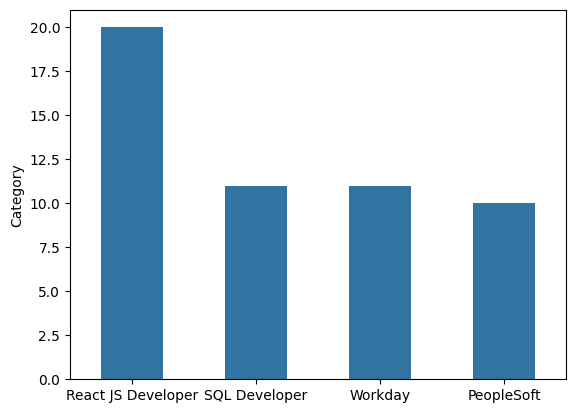

In [ ]:
category_counts = resume_data['Category'].value_counts()

ax = sns.barplot(x=list(category_counts.index),y=category_counts,width=0.5)


N gram---Used to see which word often show up together

In [ ]:
from textblob import TextBlob
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
TextBlob(resume_data['Final_Clean_Resumes'][1]).ngrams(2)[:20]

[WordList(['classification', 'internal']),
 WordList(['internal', 'classification']),
 WordList(['classification', 'internal']),
 WordList(['internal', 'murali']),
 WordList(['murali', 'experience']),
 WordList(['experience', 'summary']),
 WordList(['summary', 'years']),
 WordList(['years', 'experience']),
 WordList(['experience', 'working']),
 WordList(['working', 'peoplesoft']),
 WordList(['peoplesoft', 'administration']),
 WordList(['administration', 'performing']),
 WordList(['performing', 'various']),
 WordList(['various', 'infrastructure']),
 WordList(['infrastructure', 'related']),
 WordList(['related', 'activities']),
 WordList(['activities', 'peoplesoft']),
 WordList(['peoplesoft', 'environments']),
 WordList(['environments', 'installed']),
 WordList(['installed', 'configured'])]

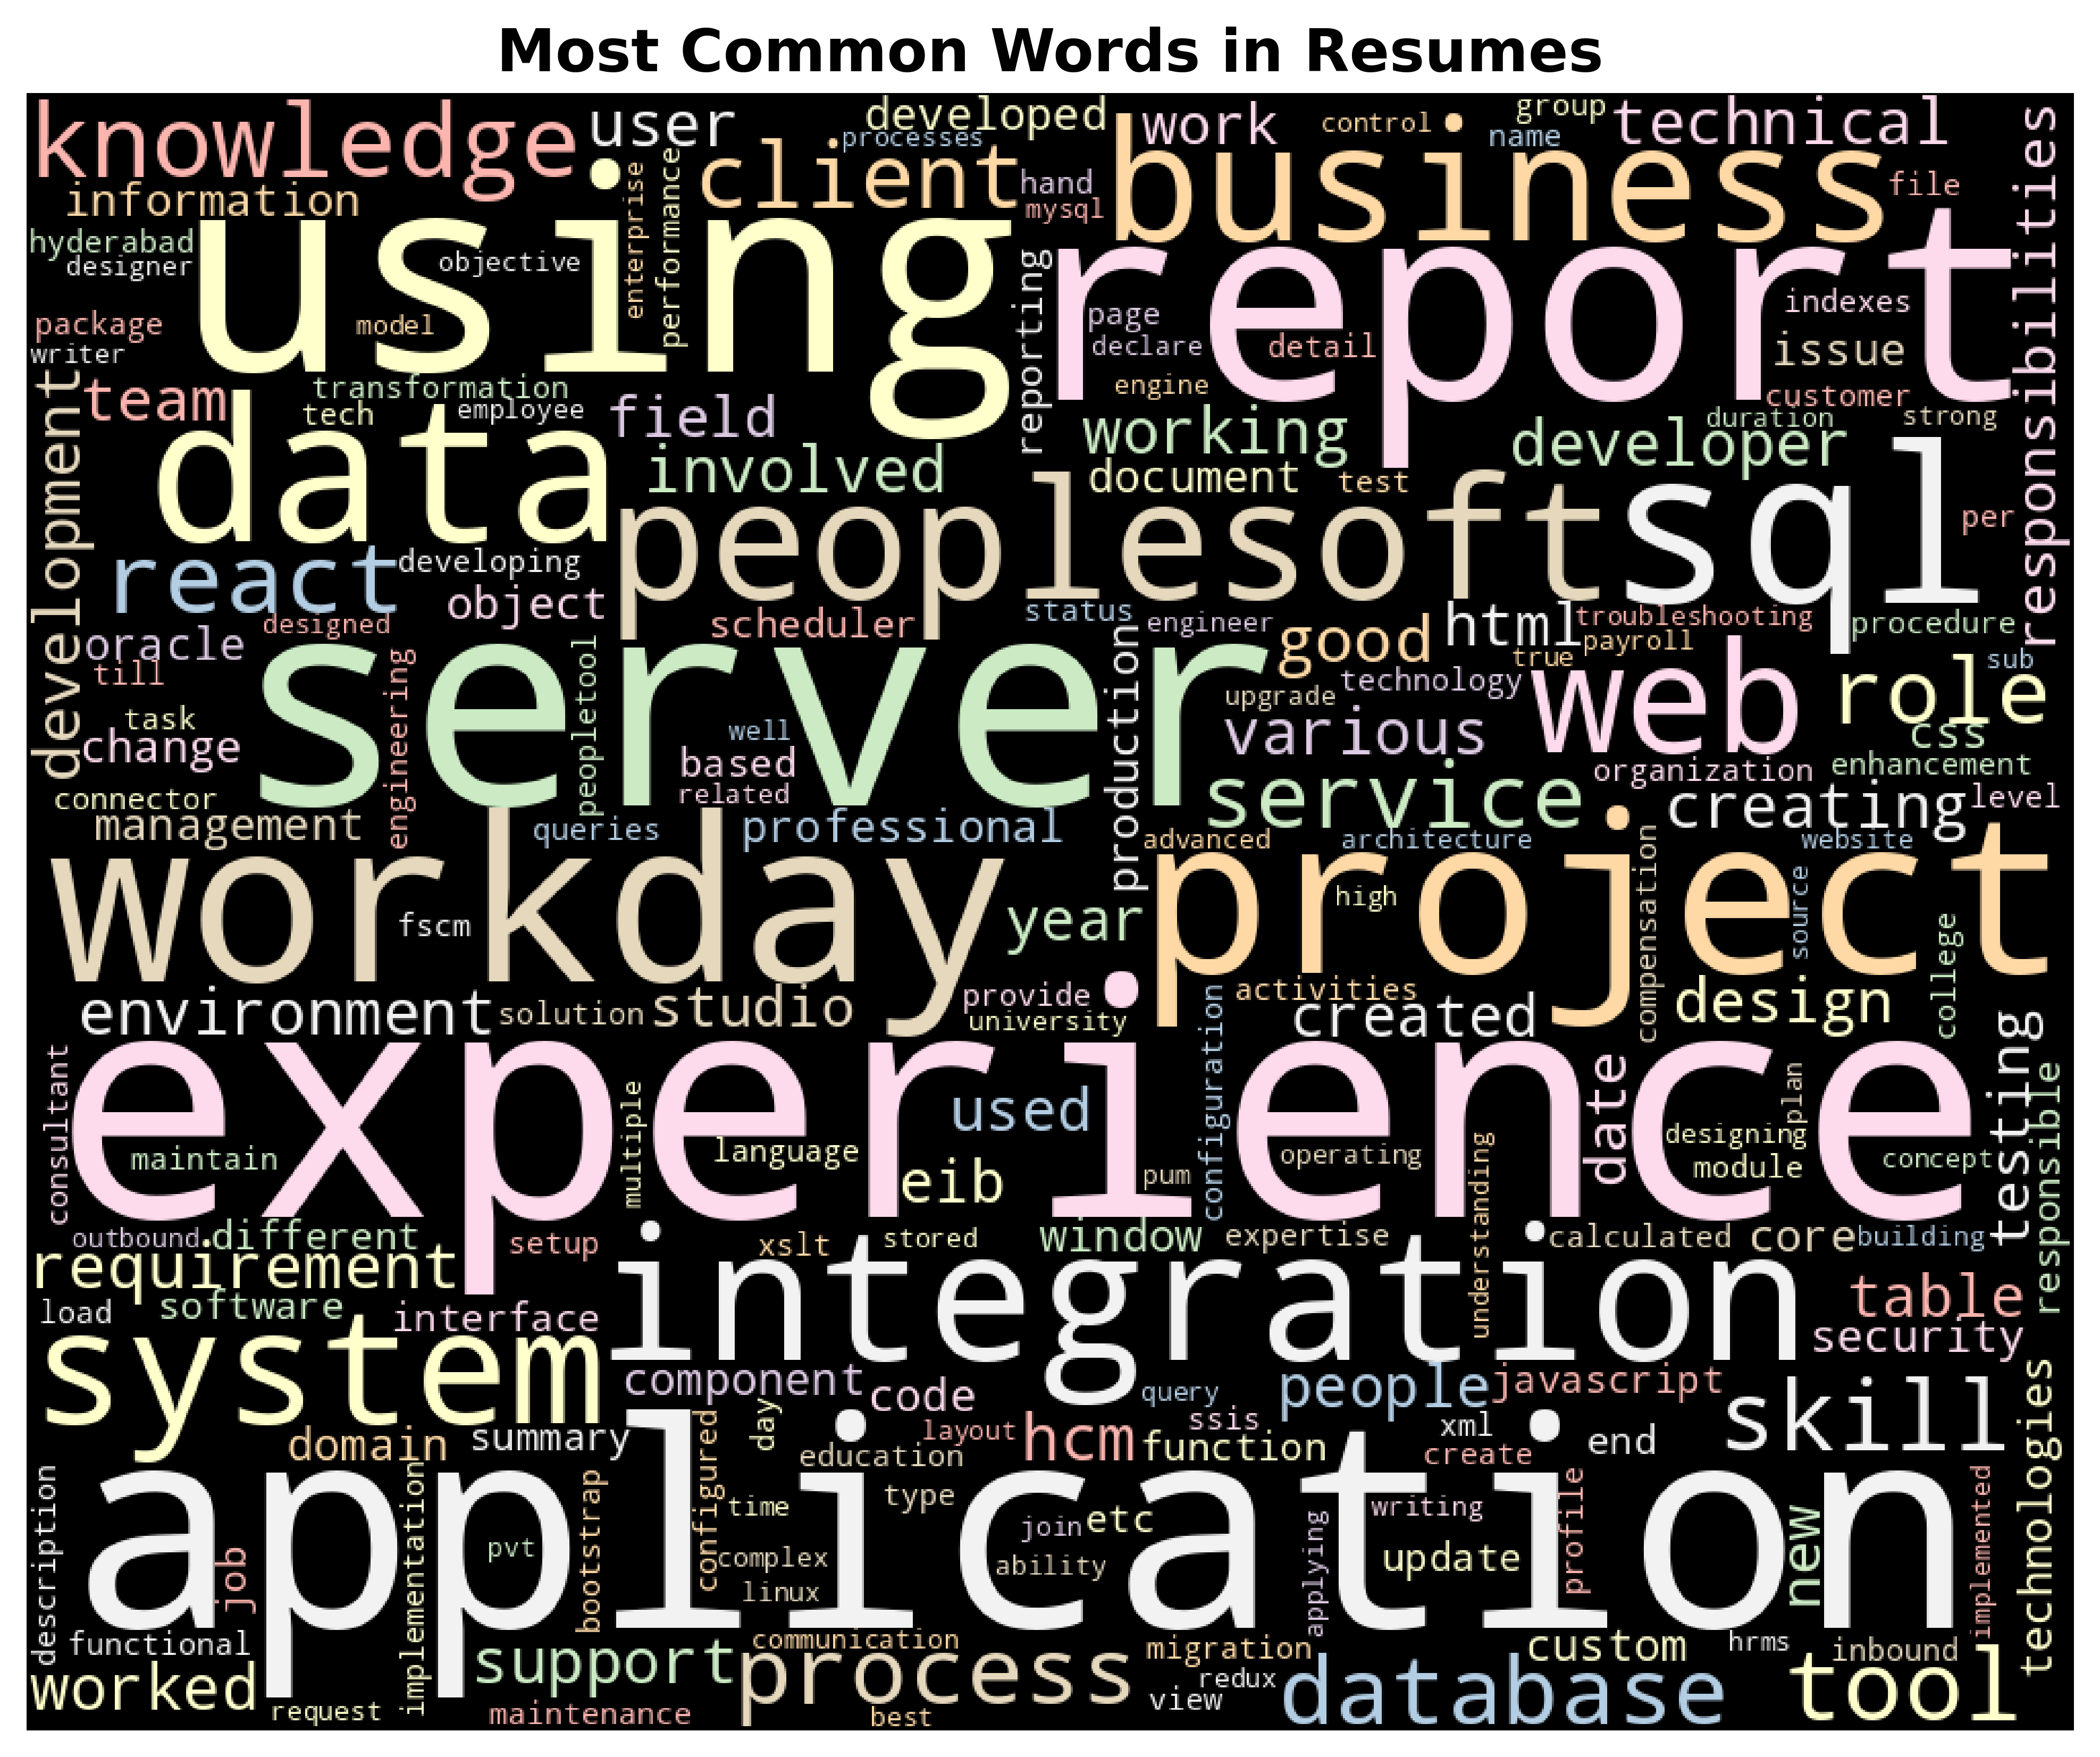

In [ ]:
text = " ".join(cat for cat in resume_data.Final_Clean_Resumes) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black",
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,8), dpi=500) # Display the generated Word Cloud
plt.title('Most Common Words in Resumes', fontsize= 16, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
requiredText = resume_data['Final_Clean_Resumes'].values
requiredTarget = resume_data['Category'].values

word_vectorizer = TfidfVectorizer(sublinear_tf=True,stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, requiredTarget, random_state=45, test_size=0.20,stratify=requiredTarget)
X_train.shape, X_test.shape

((41, 3152), (11, 3152))

# Model Building

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
predict1 = lg.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score,precision_score,confusion_matrix,recall_score,accuracy_score
accuracy_1 = accuracy_score(y_test,predict1)
accuracy_1

0.8181818181818182

In [ ]:
cm = confusion_matrix(y_test,predict1)
cm

array([[1, 1, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 2, 0],
       [0, 1, 0, 2]])

Text(50.722222222222214, 0.5, 'Truth')

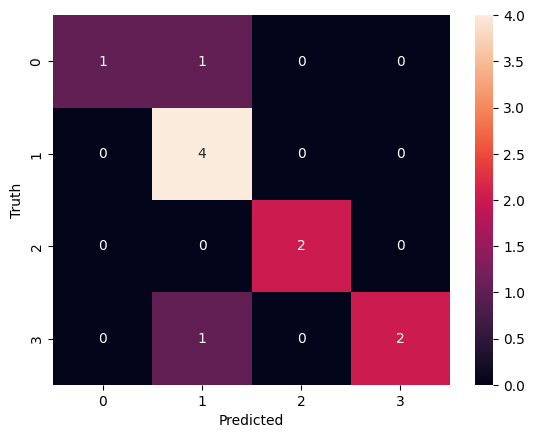

In [ ]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict1))

                    precision    recall  f1-score   support

        PeopleSoft       1.00      0.50      0.67         2
React JS Developer       0.67      1.00      0.80         4
     SQL Developer       1.00      1.00      1.00         2
           Workday       1.00      0.67      0.80         3

          accuracy                           0.82        11
         macro avg       0.92      0.79      0.82        11
      weighted avg       0.88      0.82      0.81        11



In [ ]:
accuracy_1 = round(accuracy_score(y_test,predict1),4)
precision_1 = round(precision_score(y_test,predict1,average = 'macro'),4)
recall_1 = round(recall_score(y_test,predict1, average = 'macro'),4)
f1_1 = round(f1_score(y_test,predict1, average = 'macro'),4)

In [ ]:
print('Accuracy Score  : ', accuracy_1)
print('Precision Score : ', precision_1)
print('Recall Score    : ', recall_1)
print('f1-Score        : ', f1_1)

Accuracy Score  :  0.8182
Precision Score :  0.9167
Recall Score    :  0.7917
f1-Score        :  0.8167


Naive-Bayes Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(X_train,y_train)
predict2=nb.predict(X_test)

In [ ]:
accuracy_2 = accuracy_score(y_test,predict2)
accuracy_2

0.9090909090909091

In [ ]:
cm2=confusion_matrix(y_test,predict2)
cm2

array([[1, 1, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3]])

Text(50.722222222222214, 0.5, 'Truth')

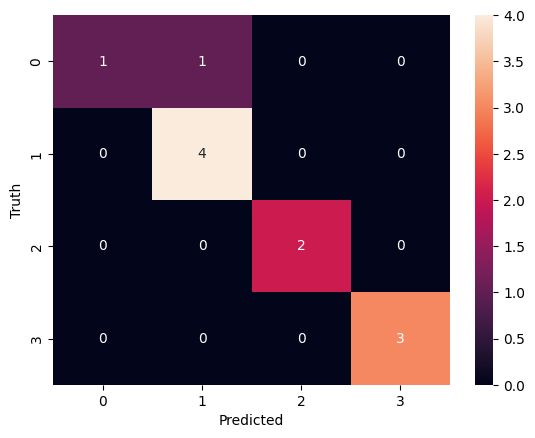

In [ ]:
sns.heatmap(cm2,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
print(classification_report(y_test,predict2))

                    precision    recall  f1-score   support

        PeopleSoft       1.00      0.50      0.67         2
React JS Developer       0.80      1.00      0.89         4
     SQL Developer       1.00      1.00      1.00         2
           Workday       1.00      1.00      1.00         3

          accuracy                           0.91        11
         macro avg       0.95      0.88      0.89        11
      weighted avg       0.93      0.91      0.90        11



In [ ]:
accuracy_2 = round(accuracy_score(y_test,predict2),4)
precision_2 = round(precision_score(y_test,predict2,average = 'macro'),4)
recall_2 = round(recall_score(y_test,predict2, average = 'macro'),4)
f1_2 = round(f1_score(y_test,predict2, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_2)
print('Precision Score : ', precision_2)
print('Recall Score    : ', recall_2)
print('f1-Score        : ', f1_2)

Accuracy Score  :  0.9091
Precision Score :  0.95
Recall Score    :  0.875
f1-Score        :  0.8889


Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)
predict3=dt.predict(X_test)

In [ ]:
accuracy_3 = accuracy_score(y_test,predict3)
accuracy_3

1.0

In [ ]:
cm3=confusion_matrix(y_test,predict3)
cm3

array([[2, 0, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3]])

Text(50.722222222222214, 0.5, 'Truth')

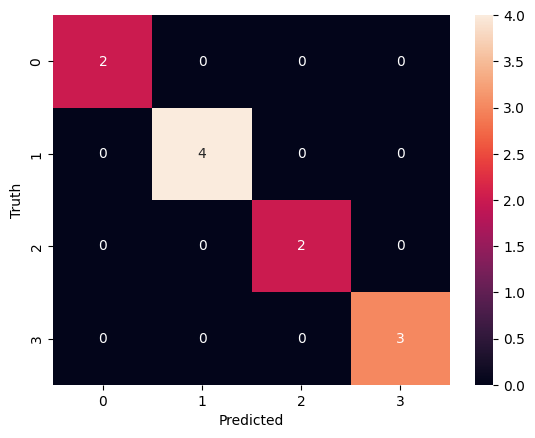

In [ ]:
sns.heatmap(cm3,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
print(classification_report(y_test,predict3))

                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         2
React JS Developer       1.00      1.00      1.00         4
     SQL Developer       1.00      1.00      1.00         2
           Workday       1.00      1.00      1.00         3

          accuracy                           1.00        11
         macro avg       1.00      1.00      1.00        11
      weighted avg       1.00      1.00      1.00        11



In [ ]:
accuracy_3 = round(accuracy_score(y_test,predict3),4)
precision_3 = round(precision_score(y_test,predict3,average = 'macro'),4)
recall_3 = round(recall_score(y_test,predict3, average = 'macro'),4)
f1_3 = round(f1_score(y_test,predict3, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_3)
print('Precision Score : ', precision_3)
print('Recall Score    : ', recall_3)
print('f1-Score        : ', f1_3)

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


Support Vector Machine Classifier

In [ ]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train,y_train)
predict4 = sv.predict(X_test)

In [ ]:
accuracy_4 = accuracy_score(y_test,predict4)
accuracy_4

0.8181818181818182

In [ ]:
cm4 = confusion_matrix(y_test,predict4)
cm4

array([[1, 1, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 2, 0],
       [0, 1, 0, 2]])

Text(50.722222222222214, 0.5, 'Truth')

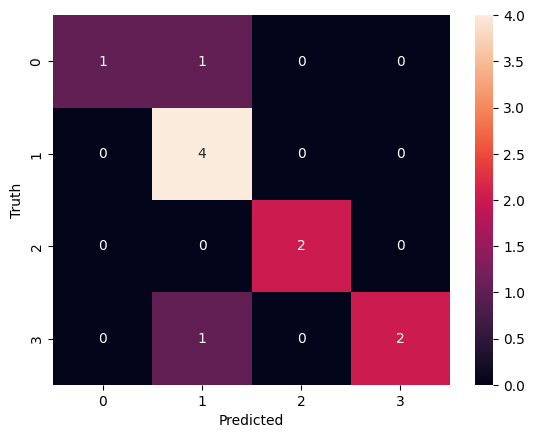

In [ ]:
sns.heatmap(cm4,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
print(classification_report(y_test,predict4))

                    precision    recall  f1-score   support

        PeopleSoft       1.00      0.50      0.67         2
React JS Developer       0.67      1.00      0.80         4
     SQL Developer       1.00      1.00      1.00         2
           Workday       1.00      0.67      0.80         3

          accuracy                           0.82        11
         macro avg       0.92      0.79      0.82        11
      weighted avg       0.88      0.82      0.81        11



In [ ]:
accuracy_4 = round(accuracy_score(y_test,predict4),4)
precision_4 = round(precision_score(y_test,predict4,average = 'macro'),4)
recall_4 = round(recall_score(y_test,predict4, average = 'macro'),4)
f1_4 = round(f1_score(y_test,predict4, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_4)
print('Precision Score : ', precision_4)
print('Recall Score    : ', recall_4)
print('f1-Score        : ', f1_4)


Accuracy Score  :  0.8182
Precision Score :  0.9167
Recall Score    :  0.7917
f1-Score        :  0.8167


Random forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
predict5=rf.predict(X_test)

In [ ]:
accuracy_5 = accuracy_score(y_test,predict5)
accuracy_5

1.0

In [ ]:
cm5=confusion_matrix(y_test,predict5)
cm5

array([[2, 0, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3]])

Text(50.722222222222214, 0.5, 'Truth')

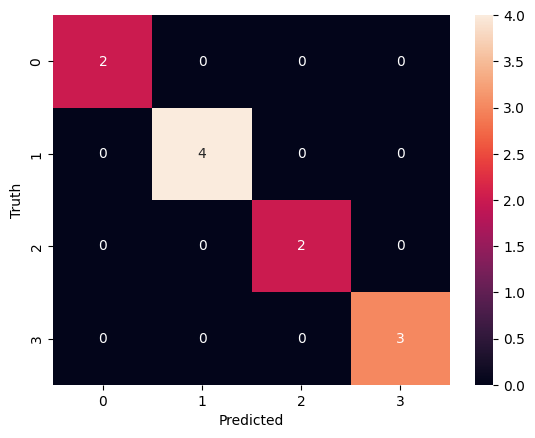

In [ ]:
sns.heatmap(cm5,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
print(classification_report(y_test,predict5))

                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         2
React JS Developer       1.00      1.00      1.00         4
     SQL Developer       1.00      1.00      1.00         2
           Workday       1.00      1.00      1.00         3

          accuracy                           1.00        11
         macro avg       1.00      1.00      1.00        11
      weighted avg       1.00      1.00      1.00        11



In [ ]:
accuracy_5 = round(accuracy_score(y_test,predict5),4)
precision_5 = round(precision_score(y_test,predict5,average = 'macro'),4)
recall_5 = round(recall_score(y_test,predict5, average = 'macro'),4)
f1_5 = round(f1_score(y_test,predict5, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_5)
print('Precision Score : ', precision_5)
print('Recall Score    : ', recall_5)
print('f1-Score        : ', f1_5)

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


In [ ]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

AdaBoost classifier

In [ ]:
ab = AdaBoostClassifier()
ab.fit(X_train,y_train)
predict6=ab.predict(X_test)

In [ ]:
accuracy_6 = accuracy_score(y_test,predict6)
accuracy_6

0.9090909090909091

In [ ]:
cm6 = confusion_matrix(y_test,predict6)
cm6

array([[2, 0, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 2, 0],
       [0, 1, 0, 2]])

Text(50.722222222222214, 0.5, 'Truth')

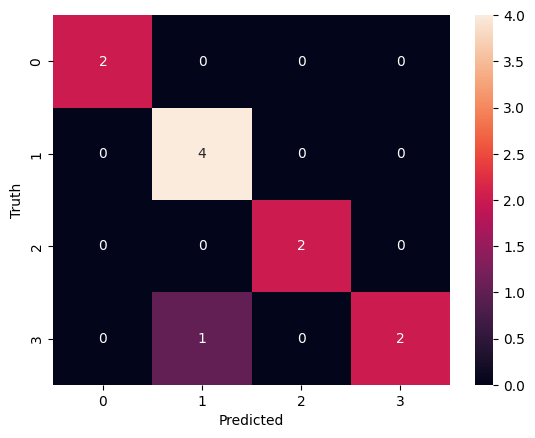

In [ ]:
sns.heatmap(cm6,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
print(classification_report(y_test,predict6))

                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         2
React JS Developer       0.80      1.00      0.89         4
     SQL Developer       1.00      1.00      1.00         2
           Workday       1.00      0.67      0.80         3

          accuracy                           0.91        11
         macro avg       0.95      0.92      0.92        11
      weighted avg       0.93      0.91      0.91        11



In [ ]:
accuracy_6 = round(accuracy_score(y_test,predict6),4)
precision_6 = round(precision_score(y_test,predict6,average = 'macro'),4)
recall_6 = round(recall_score(y_test,predict6, average = 'macro'),4)
f1_6 = round(f1_score(y_test,predict6, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_6)
print('Precision Score : ', precision_6)
print('Recall Score    : ', recall_6)
print('f1-Score        : ', f1_6)

Accuracy Score  :  0.9091
Precision Score :  0.95
Recall Score    :  0.9167
f1-Score        :  0.9222


Gradient Boosting

In [ ]:
gd = GradientBoostingClassifier()
gd.fit(X_train,y_train)
predict7 = gd.predict(X_test)


In [ ]:
accuracy_7 = accuracy_score(y_test,predict7)
accuracy_7

1.0

In [ ]:
cm7 = confusion_matrix(y_test,predict7)
cm7

array([[2, 0, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3]])

Text(50.722222222222214, 0.5, 'Truth')

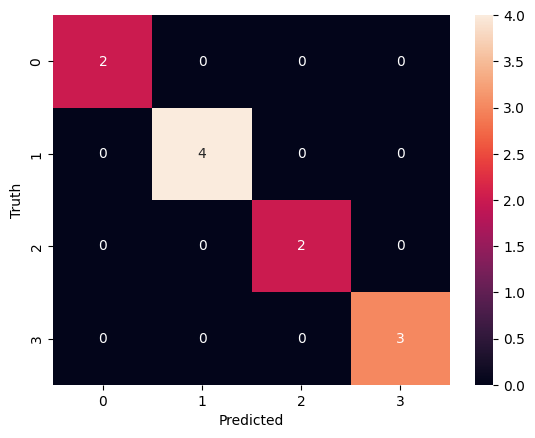

In [ ]:
sns.heatmap(cm7,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
print(classification_report(y_test,predict7))

                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         2
React JS Developer       1.00      1.00      1.00         4
     SQL Developer       1.00      1.00      1.00         2
           Workday       1.00      1.00      1.00         3

          accuracy                           1.00        11
         macro avg       1.00      1.00      1.00        11
      weighted avg       1.00      1.00      1.00        11



In [ ]:
accuracy_7 = round(accuracy_score(y_test,predict7),4)
precision_7 = round(precision_score(y_test,predict7,average = 'macro'),4)
recall_7 = round(recall_score(y_test,predict7, average = 'macro'),4)
f1_7 = round(f1_score(y_test,predict7, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_7)
print('Precision Score : ', precision_7)
print('Recall Score    : ', recall_7)
print('f1-Score        : ', f1_7)

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


In [ ]:
table = {'Classifier' : ['Logistic Regression','Naive-Bayes Classifier','Decision Tree Classifier','SVC Classifier','Random tree classifier','AdaBoost Classifier', 'Gradient Boosting Classifier'], 'Accuracy' : [accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_5, accuracy_6, accuracy_7], 'Precision Score' : [precision_1, precision_2, precision_3, precision_4, precision_5, precision_6, precision_7], 'Recall Score' : [recall_1, recall_2, recall_3, recall_4, recall_5, recall_6, recall_7], 'F1_Score' : [f1_1, f1_2, f1_3, f1_4, f1_5, f1_6, f1_7]}
table = pd.DataFrame(table)
table.sort_values(["Accuracy"],inplace = True, ignore_index=True)
table

,Classifier,Accuracy,Precision Score,Recall Score,F1_Score
0,Logistic Regression,0.8182,0.9167,0.7917,0.8167
1,SVC Classifier,0.8182,0.9167,0.7917,0.8167
2,Naive-Bayes Classifier,0.9091,0.9500,0.8750,0.8889
3,AdaBoost Classifier,0.9091,0.9500,0.9167,0.9222
4,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000
5,Random tree classifier,1.0000,1.0000,1.0000,1.0000
6,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000


# Model deployment

In [ ]:
!pip install PyPDF2
!pip install streamlit
!pip install textract
!pip install python-docx
!pip install scikit-learn
!pip install pdfplumber
!pip install pdf2dox
!pip install python-docx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 55.8 MB/s eta 0:00:00
  Attempting uninstall: pdfminer.six
    Found existing installation: pdfminer.six 20191110
    Uninstalling pdfminer.six-20191110:
      Successfully uninstalled pdfminer.six-20191110
ERROR: pip'

In [ ]:
import pickle
filename = 'RF_model.pkl'
pickle.dump(rf,open(filename,'wb'))

In [ ]:
filename = 'vector.pkl'
pickle.dump(word_vectorizer,open(filename,'wb'))

In [ ]:
# IMPORT LIBRARIES
import re
import PyPDF2
import docx2txt
import pdfplumber
import pandas as pd
import streamlit as st

import en_core_web_sm
nlp = en_core_web_sm.load()
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving skills.csv to skills.csv


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving requirements.txt to requirements.txt


In [ ]:
%%writefile app.py
# IMPORT LIBRARIES
import re
import PyPDF2
import docx2txt
import pdfplumber
import pandas as pd
import streamlit as st

import en_core_web_sm
nlp = en_core_web_sm.load()
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

#----------------------------------------------------------------------------------------------------

st.title('RESUME CLASSIFICATION')
st.markdown('<style>h1{color: Purple;}</style>', unsafe_allow_html=True)
st.subheader('Welcome to Resume Classification App')

# FUNCTIONS
def extract_skills(resume_text):
    nlp_text = nlp(resume_text)
    noun_chunks = nlp_text.noun_chunks
    tokens = [token.text for token in nlp_text if not token.is_stop] # removing stop words and implementing word tokenization

    data = pd.read_csv(r"skills.csv") # reading the csv file
    skills = list(data.columns.values) # extract values
    skillset = []

    for token in tokens: # check for one-grams (example: python)
        if token.lower() in skills:
            skillset.append(token)

    for token in noun_chunks: # check for bi-grams and tri-grams (example: machine learning)
        token = token.text.lower().strip()
        if token in skills:
            skillset.append(token)
    return [i.capitalize() for i in set([i.lower() for i in skillset])]

def getText(filename):
    fullText = '' # Create empty string
    if filename.type == "application/vnd.openxmlformats-officedocument.wordprocessingml.document":
        doc = docx2txt.process(filename)
        for para in doc:
            fullText = fullText + para
    else:
        with pdfplumber.open(filename) as pdf_file:
            pdoc = PyPDF2.PdfFileReader(filename)
            number_of_pages = pdoc.getNumPages()
            page = pdoc.pages[0]
            page_content = page.extractText()
        for paragraph in page_content:
            fullText =  fullText + paragraph
    return (fullText)

def display(doc_file):
    resume = []
    if doc_file.type == "application/vnd.openxmlformats-officedocument.wordprocessingml.document":
        resume.append(docx2txt.process(doc_file))
    else:
        with pdfplumber.open(doc_file) as pdf:
            pages=pdf.pages[0]
            resume.append(pages.extract_text())
    return resume

def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w) for w in filtered_words]
    return " ".join(lemma_words)

file_type=pd.DataFrame([], columns=['Uploaded File',  'Predicted Profile','Skills',])
filename = []
predicted = []
skills = []

#-------------------------------------------------------------------------------------------------
# MAIN CODE
import pickle as pk
model = pk.load(open(r'RF_model.pkl', 'rb'))
Vectorizer = pk.load(open(r'vector.pkl', 'rb'))

upload_file = st.file_uploader('Upload Your Resumes', type= ['docx','pdf'],accept_multiple_files=True)

for doc_file in upload_file:
    if doc_file is not None:
        filename.append(doc_file.name)
        cleaned = preprocess(display(doc_file))
        prediction = model.predict(Vectorizer.transform([cleaned]))[0]
        predicted.append(prediction)
        extText = getText(doc_file)
        skills.append(extract_skills(extText))

if len(predicted) > 0:
    file_type['Uploaded File'] = filename
    file_type['Skills'] = skills
    file_type['Predicted Profile'] = predicted
    st.table(file_type.style.format())

select = ['PeopleSoft','SQL Developer','React JS Developer','Workday']
st.subheader('Select as per Requirement')
option = st.selectbox('Fields',select)

if option == 'PeopleSoft':
    st.table(file_type[file_type['Predicted Profile'] == 'PeopleSoft'])
elif option == 'SQL Developer':
    st.table(file_type[file_type['Predicted Profile'] == 'SQL Developer'])
elif option == 'React JS Developer':
    st.table(file_type[file_type['Predicted Profile'] == 'React JS Developer'])
elif option == 'Workday':
    st.table(file_type[file_type['Predicted Profile'] == 'Workday'])

Writing app.py


In [ ]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 2.48s

3 packages are looking for funding
  run `npm fund` for details

found 1 moderate severity vulnerability
  run `npm audit fix` to fix them, or `npm audit` for details


In [ ]:
!streamlit run app.py &>/content/logs.txt &

In [ ]:
!npx localtunnel --port 8501  & curl ipv4.icanhazip.com

35.201.174.29
npx: installed 22 in 2.423s
your url is: https://few-plants-draw.loca.lt
